# Prediction of CO2 Emission per Country
### Pappo, Katz, Pimenta Silva, Tuncel

## Importing and Downloading

In [318]:
import numpy as np
import pandas as pd

In [319]:
df_CO2_brut = pd.read_csv('data/GCB2022v27_MtCo2_flat.csv')
# df_CO2

In [320]:
df_GEI_brut = pd.read_csv('data/Global Economy Indicators.csv')
# df_GEI_brut

## Cleaning the datasets

In [321]:
# Drop rows where year is less than 1970
df_CO2 = df_CO2_brut.drop(df_CO2_brut[df_CO2_brut['Year'] < 1970].index)

df_CO2 = df_CO2.drop(columns=['ISO 3166-1 alpha-3'])

# Replace NaN values with 0
df_CO2 = df_CO2.replace(np.nan, 0)

# Delete spaces in column names
df_CO2.columns = df_CO2.columns.str.strip()

df_CO2['Country'] = df_CO2['Country'].replace({'USA': 'United States of America'})
df_CO2['Country'] = df_CO2['Country'].replace({'Democratic Republic of the Congo': 'Democratic Republic of Congo'})

df_CO2.reset_index(drop=True, inplace=True)
# df_CO2.head()

In [322]:
# Drop columns that are not needed
df_GEI = df_GEI_brut.drop(columns=[
    ' Currency ',
    ' AMA exchange rate ', 
    ' IMF based exchange rate ', 
    ' Changes in inventories ', 
    ' Other Activities (ISIC J-P) '])

# Delete spaces in column names
df_GEI.columns = df_GEI.columns.str.strip()

# Delete spaces in Country names
df_GEI['Country'] = df_GEI['Country'].str.strip()

# Replace some country names
df_GEI['Country'] = df_GEI['Country'].replace({'United States': 'United States of America'})
df_GEI['Country'] = df_GEI['Country'].replace({'D.R. of the Congo': 'Democratic Republic of Congo'})
df_GEI['Country'] = df_GEI['Country'].replace({'Russian Federation': 'Russia'})

df_GEI.reset_index(drop=True, inplace=True)

# Rename columns
df_GEI.rename(columns={
    'Agriculture, hunting, forestry, fishing (ISIC A-B)': 'Agriculture & Fishing',
    'Construction (ISIC F)': 'Construction',
    'Exports of goods and services': 'Exports',
    'Final consumption expenditure': 'Final Consumption',
    'General government final consumption expenditure': 'Gov. Consumption',
    'Gross capital formation': 'Gross Capital Formation',
    'Gross fixed capital formation (including Acquisitions less disposals of valuables)': 'Gross Fixed Capital',
    'Household consumption expenditure (including Non-profit institutions serving households)': 'Household Consumption',
    'Imports of goods and services': 'Imports',
    'Manufacturing (ISIC D)': 'Manufacturing',
    'Mining, Manufacturing, Utilities (ISIC C-E)': 'Mining & Utilities',
    'Total Value Added': 'Total Value Added',
    'Transport, storage and communication (ISIC I)': 'Transport & Comm.',
    'Wholesale, retail trade, restaurants and hotels (ISIC G-H)': 'Wholesale & Retail',
    'Gross National Income(GNI) in USD': 'GNI (USD)',
    'Gross Domestic Product (GDP)': 'GDP',
    'Total': 'Total'
}, inplace=True)

# Fill NaN values with the mean of the column
# for col in df_GEI.columns: print(f'{col}: {df_GEI[col].isnull().mean() * 100:.2f}% null')
for col in df_GEI.columns: df_GEI[col] = df_GEI[col].fillna("NA" if df_GEI[col].dtype == 'O' else df_GEI[col].mean())

# df_GEI.head()

### Merging Datasets

In [323]:
# Merge the two dataframes on 'Country' and 'Year'
df = df_GEI.merge(df_CO2, on=['Country', 'Year'])

df.head()

,CountryID,Country,Year,Population,Per capita GNI,Agriculture & Fishing,Construction,Exports,Final Consumption,Gov. Consumption,...,GNI (USD),GDP,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,4,Afghanistan,1970,10752971,164,8.699174e+08,46793902.0,165618722.0,1.663221e+09,112126986.0,...,1.766528e+09,1.731436e+09,1.670397,0.436974,0.671986,0.216651,0.047350,0.297436,0.0,0.155343
1,4,Afghanistan,1971,11015857,168,9.108281e+08,48994113.0,193580300.0,1.796541e+09,121114833.0,...,1.850122e+09,1.812838e+09,1.893554,0.359072,0.747456,0.439680,0.043234,0.304112,0.0,0.171893
2,4,Afghanistan,1972,11286753,149,8.279453e+08,44535223.0,227654380.0,1.607159e+09,108347543.0,...,1.683948e+09,1.647900e+09,1.530347,0.190528,0.626544,0.300448,0.046427,0.366400,0.0,0.135588
3,4,Afghanistan,1973,11575305,150,8.554869e+08,46018542.0,226913554.0,1.617037e+09,109013455.0,...,1.739998e+09,1.702716e+09,1.635454,0.310745,0.701918,0.332680,0.067106,0.223005,0.0,0.141288
4,4,Afghanistan,1974,11869879,177,1.035913e+09,55721659.0,284938449.0,1.907408e+09,128588961.0,...,2.106420e+09,2.061729e+09,1.913152,0.304695,0.770914,0.400141,0.070301,0.367102,0.0,0.161177


## Vizualisation

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt

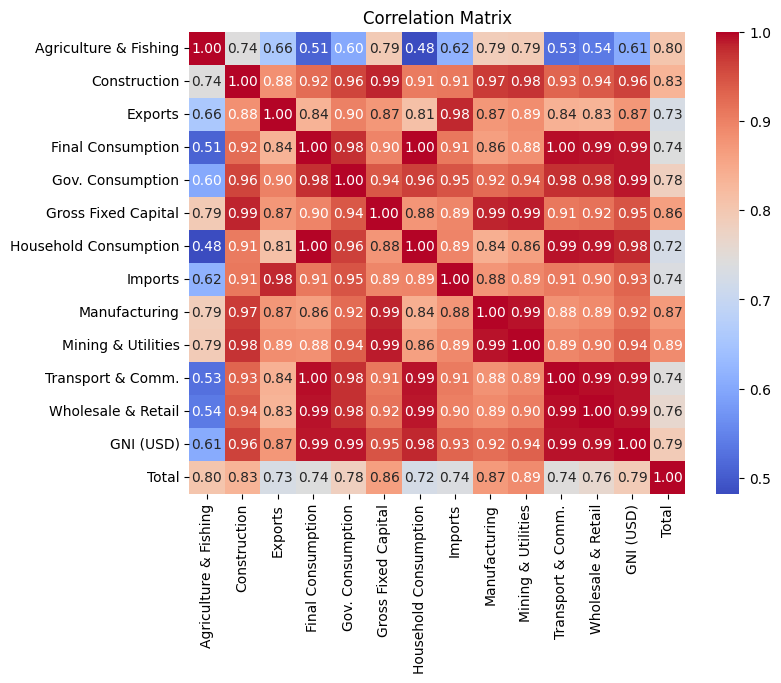

In [325]:
df_corr = df[[
    'Agriculture & Fishing',
    'Construction',
    'Exports',
    'Final Consumption',
    'Gov. Consumption',
    'Gross Fixed Capital',
    'Household Consumption',
    'Imports', 
    'Manufacturing',
    'Mining & Utilities', 
    'Transport & Comm.',
    'Wholesale & Retail',
    'GNI (USD)', 
    'Total']].corr()

plt.figure(figsize=(8, 6))  # Définir la taille de la figure
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

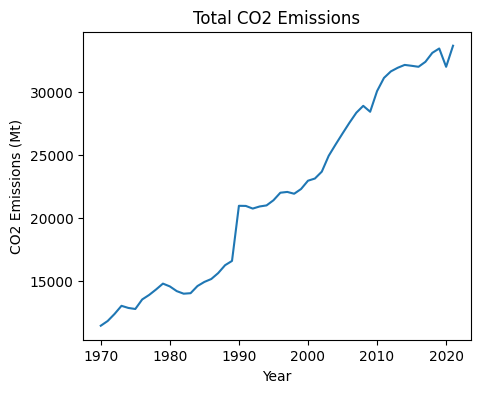

In [326]:
df_total = df[['Year', 'Total']].groupby('Year').sum().reset_index()

plt.figure(figsize=(5, 4))
plt.plot(df_total['Year'], df_total['Total'], label='Total CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.title('Total CO2 Emissions')
plt.show() 

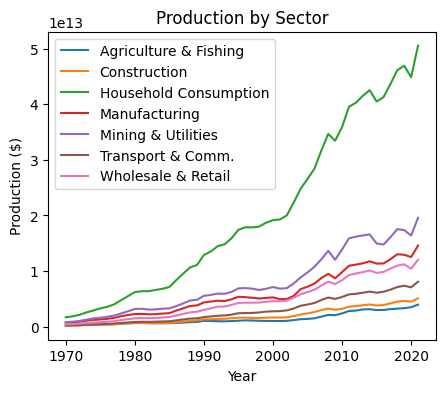

In [327]:
# Group by year and sum the production for each sector and countries
df_prod = df.groupby('Year')[
    ['Agriculture & Fishing', 'Construction', 'Household Consumption', 
     'Manufacturing', 'Mining & Utilities', 'Transport & Comm.', 'Wholesale & Retail']
].sum().reset_index()

# List of sectors
sectors = ['Agriculture & Fishing', 'Construction', 'Household Consumption', 
           'Manufacturing', 'Mining & Utilities', 'Transport & Comm.', 'Wholesale & Retail']

plt.figure(figsize=(5, 4))
for sector in sectors:
    plt.plot(df_prod['Year'], df_prod[sector], label=sector)

plt.xlabel('Year')
plt.ylabel('Production ($)')
plt.title('Production by Sector')
plt.legend()
plt.show()

In [328]:
import geopandas as gpd

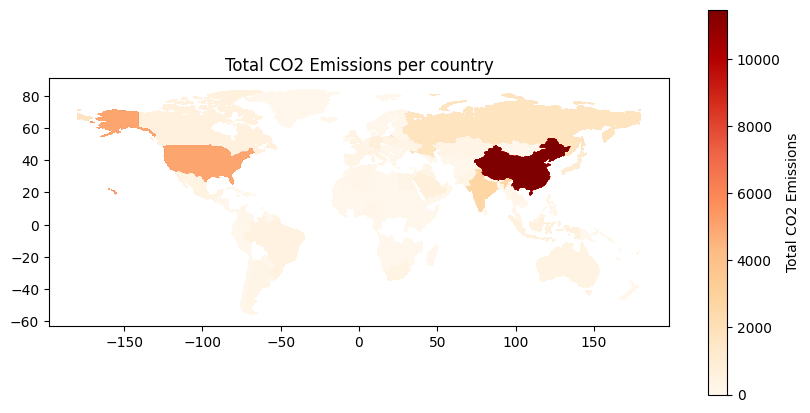

In [329]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf = gpd.read_file(url)

df_world = gdf.merge(df, left_on='ADMIN', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_world.plot(column='Total',
              cmap='OrRd',
              legend=True,
              legend_kwds={'label': "Total CO2 Emissions"},
              ax=ax)

ax.set_title('Total CO2 Emissions per country')
plt.show()

In [335]:
df[['Agriculture & Fishing', 'Manufacturing', 'Mining & Utilities', 'Household Consumption']].shape


(9215, 4)

In [ ]:
# columns_to_plot = [
#     'Agriculture & Fishing', 
#     'Manufacturing', 
#     'Mining & Utilities', 
#     'Household Consumption'
# ]

# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# axes = axes.flatten()  # Convertir les axes en une liste pour itérer facilement

# # Boucle pour créer chaque graphique
# for i, col in enumerate(columns_to_plot):
#     axes[i].scatter( df['Total'], df[col], alpha=0.7)
#     axes[i].set_title(f'{col} vs Total')
#     axes[i].set_xlabel('Total (émissions de CO₂)')
#     axes[i].set_ylabel(col)

# plt.legend()
# plt.show()

## Prediction

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [311]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_corr.drop(columns=['Total']), df_corr['Total'], test_size=0.2, random_state=42)

In [343]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)

print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('R2 Score:', r2_score(ytest, ypred))

Mean Squared Error: 0.02031902133510657
R2 Score: -6.389258516879487


In [344]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('R2 Score:', r2_score(ytest, ypred))

Mean Squared Error: 0.005224324966412566
R2 Score: -0.8998891293209874
